<a href="https://colab.research.google.com/github/somigood/board/blob/master/1)%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%9B%88%EB%A0%A8%EB%AA%A8%EB%8D%B8%EC%83%9D%EC%84%B1_%EB%B0%8F_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### 패키지 불러들이기
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt  

In [ ]:

### 실행마다 동일한 결과 얻기위해 랜덤한 값 변하지 않게 만들어줌
#- 케라스에 랜덤 시드 사용--일반적으로 42번을 많이 사용
tf.keras.utils.set_random_seed(42)

#- 텐서플로 연산을 고정적으로 만들어서 연산시킴--연산규칙 동일하게 나옴
tf.config.experimental.enable_op_determinism()

### 패션 mnist 데이터 읽어들이기

In [ ]:
### 패션 mnist 데이터 읽어들이기
(train_input, train_target),(test_input, test_target) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
### 훈련 데이터 차원 확인하기
print(train_input.shape, train_target.shape)  
# (3차원 종속변수, 1차원 독립변수)
# (60000개 이미지, 크기28*28)(0~9사이의 정수 60000개)

(60000, 28, 28) (60000,)


In [ ]:
### 테스트 데이터 차원 확인하기
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [ ]:
train_input

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_target

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
### train_target 데이터의 고유한 값(중복된 값 제외) 확인하기
# 각 타겟별로 카운트
print(np.unique(train_target, return_counts=True))
# 레이블마다 6000개씩 10개->60000개 샘플이 있다는 것
# 넘파이 unique()함수로 레이블 당 샘플개수 확인

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
### 시각화로 데이터 확인해보기
# 훈련데이터(train_input) 10개 조회
for i in range(10):
  print(i, "=====", train_input[i])

0 ===== [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 20

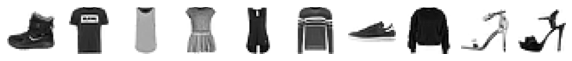

In [ ]:
### 훈련 데이터(train_input)에서 10개만 출력
#반복문 사용/ index값 사용

#여러개의 그래프를 하나의 공간에 (1행 10열, 10*10사이즈로) 그리겠다
fig, axs = plt.subplots(1,10, figsize=(10,10))  # axs-> 공간번호

for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r') # 0~9까지 자리에 0~9 이미지를 넣어서 보여주기
  axs[i].axis("off") # 그래프(fig) 사각형 박스의 xy축 숨기기

plt.show()

In [ ]:
###train_target 데이터에서 10개 데이터 추출하기
for j in range(10):
  print(train_target[j])

print([train_target[i] for i in range(10)])
print(train_target[:10])

9
0
0
3
0
2
7
2
5
5
[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
[9 0 0 3 0 2 7 2 5 5]


In [ ]:
"""
0 : 티셔츠
1 : 바지
2 : 스웨터
3 : 드레스
4 : 코트
5 : 샌달
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠
"""

### 정규화 하기(데이터 전처리)

In [ ]:
train_input[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
# rgb 255개의 숫자값들을 0~1사이의 값으로 변환하기
train_scaled = train_input / 255.0
train_scaled.shape  #3차원

(60000, 28, 28)

In [ ]:
### 차원축소 3차원 -> 1차원
# 딥러닝에서 훈련에 사용되는 데이터 차원은 무조건 1차원이여야한다
# 28*28 사이즈 이미지 크기에 1차원 데이터로 만들기

train_scaled = train_scaled.reshape(-1,28*28)
train_scaled.shape
# 60000개의 행 784개의 열로 바꿈

(60000, 784)

### 확률적 경사하강법(SGDClassifier) 모델 생성하기
##### - 선형분류모델
##### - 0보다 작으면 -1, 0보다 크면 1로 분류(이진분류)

In [ ]:
(0~1 확률값)
소프트맥스 0~1사이의 모든값 (종속변수 3개이상)
시그모이드 0(0.5이하) or 1(0.5이상) (종속변수 2개)

로지스틱 회귀로 패션아이템 분류-60000개나 되는 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다
샘플을 뽑아 모델을 훈련시키기 위해 확률적 경사하강법을 사용


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=55af8d2e91c56930da8062912549354f224b2d02e078b4062e1c1ef82057168a
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
### SGDClassifier 클래스와 cross_validate 함수를 사용
# 데이터에서 교차 검증으로 성능을 확인
from sklearn.linear_model import SGDClassifier  
from sklearn.model_selection import cross_validate

In [ ]:
## SGD 모델 생성하기
# loss 손실함수 정의
# -log : Logistic regression 알고리즘을 사용하겠다는 의미
# -max_iter : 훈련 반복횟수(default = 1000회)
# -random_state : 랜덤 데이터 형태를 고정적으로 사용 / 번호(42) 의미없음 랜덤규칙 번호일 뿐

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)  #5번 훈련하겠다
sc

SGDClassifier(loss='log', max_iter=5, random_state=42)

In [ ]:
### SGD 모델 교차 검증
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1) 
scores

{'fit_time': array([6.91775465, 6.85515952, 6.80180621, 6.77894425, 4.48232245]),
 'score_time': array([0.0308013 , 0.02723646, 0.02768421, 0.03884292, 0.02094984]),
 'test_score': array([0.83      , 0.82091667, 0.82016667, 0.8095    , 0.81725   ])}

In [ ]:
#훈련 정확도(fit) -> 검증정확도(cross_validation) -> 테스트정확도(predict)
#훈련을 자동으로 예측시간 test_score
#5개의 단위를 train, test로 // test를 계속 바꿔가면서 함==>교차검증

In [ ]:
### 검증 정확도 확인하기
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)  #10번 훈련하겠다
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

#반복 횟수 늘려도 크게 향상x

0.8313333333333333


### 인공신경망으로 모델만들기

In [ ]:
### 입력(독립변수)과 출력(종속변수) 데이터 분리하기
from sklearn.model_selection import train_test_split

In [ ]:
# train_scaled 및 train_target 데이터를 이용해서
#  - 훈련8 : 검증2의 비율로 분리
#  - 랜덤 : 42 적용
# 변수명 : train_scaled, val_scaled, train_target, val_target 사용
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)
#60000개 중에 48000개 훈련세트 + 12000개가 검증 세트로 분리

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
### 신경망층(밀집층 : layer) 생성하기(1개층만 사용)
"""
-첫번째 인자 10 : 출력 뉴런의 수를 설정(units=10, units는 생략가능)
            -(10개의 패션아이템을 분류하기 때문에 매개변수 10으로 지정)
-두번째 인자 kernel_initializer
 * 가중치를 초기화하는 방법을 설정(커널(layer) 초기화라고 합니다.)
 * uniform : 균일분포로 분류
 * normal : 가우시안 분포로 분류
-세번재 인자 activation : 활성화함수 설정(훈련에 사용되는 함수)
 * linear : 입력값과 가충치로 계산된값 그대로 출력
 * sigmoid : 이진분류(종속)에서 출력층에 주로 사용 (많이 사용)
 * softmax : 다중 분류(종속)에서 출력층에 주로 사용 (많이 사용)
 * relu(Rectified Linear Unit) : 은닉층에 주로 사용(많이 사용됨)
-네번째 인자 input_shape : 입력의 크기(입력 필드의 크기)
"""
dense = keras.layers.Dense(10, kernel_initializer="uniform", activation="softmax", input_shape=(784,))
dense

# 케라스의 레이어 패키지 안에는 다양한 층이 준비
# 가장 기본이 되는 층은 밀집층, 픽셀이 총 784개, 출력층은 총 10개
# 케라스의  Dense 클래스를 사용해 밀집층을 만들어보기

In [ ]:
### 신경망 모델 생성하기
# - 모델에 신경망 층 1개를 넣어주기
# 모델 > 신경망층 
model = keras.Sequential(dense)
model

In [ ]:
### 신경망 모델 훈련방법 설정하기
"""
- loss(손실함수)
 * 다중분류(종속변수 3개이상) : sparse_categorical_crossentropy 사용
 * 이진분류(종속변수 2개) : binary_crossentropy 사용
- metrics : 모델이 훈련 시 epochs마다 손실값을 줄여주면서 진행되는
            손실률(loss)과 정확도(accuracy)를 출력하도록 설정
"""
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
model

# fit 하기 전에 손실을 줄이기 위해 compile과정 추가시킴( 손실률과 정확도를 보여줘!!)

In [ ]:
""" [케라스 손실함수(loss function)]
1. Sparse Categorical Crossentropy
 - 반환되는 Label값(종속변수)이 0, 1, 2....와 같은 정수값을 가질때 사용
 - one-hot 인코딩으로 바꾸지 않고 그냥 사용할 수 있음 
 - 출력층으로 softmax 함수사용

2. Categorical Crossentropy
 - 반환되는 Label값이 [0, 1, 0], [0, 0, 1]..과 같이 one-hot 인코딩 데이터 형태를 가질때 사용
 - 출력층으로 softmax 함수사용

3. Binary Crossentropy
 - 반환되는 Label값이 0 또는 1의 정수값을 가질 때 사용
 - 출력층으로 sigmoid 함수 사용
"""

In [ ]:
### 신경망 모델 훈련하기 : fit
model.fit(train_scaled, train_target, epochs=5) #(독립변수, 종속변수 넣고 훈련 5번해라)
# kernel_initializer="uniform" (군등)을 썼기 때문에 다 다른 1500개의 데이터를 균등하게 계속 사용

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6028 - accuracy: 0.7960
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4773 - accuracy: 0.8391
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4555 - accuracy: 0.8476
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4428 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4351 - accuracy: 0.8554


In [ ]:
### 검증데이터를 이용한 검증결과 확인하기
model.evaluate(val_scaled, val_target)
# [손실률, 정확도]-훈련보다 살짝 낮게 나옴(과대,과소적합x)

375/375 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.8490


[0.45759326219558716, 0.8489999771118164]

### 신경망층 추가하기(은닉층-hidden layer)

In [ ]:
### 은닉층-hidden layer
#add 모델을 이용해서 은닉층 추가, relu : 손실률을 줄이기 위한 hidden layer
# 모델(입력)> 은닉층(relu)>출력층(softmax)>결과확인
model.add(keras.layers.Dense(10, kernel_initializer ="uniform", activation="relu", input_shape=(784,)))
model

In [ ]:
# 신경망 모델 훈련하기 : fit
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4310 - accuracy: 0.8564
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4270 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4245 - accuracy: 0.8594
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8624
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4185 - accuracy: 0.8626


In [ ]:
# 신경망 모델 검증하기 : evaluate
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.8503


[0.4545880854129791, 0.8503333330154419]

In [ ]:
model.fit(train_scaled, train_target, epochs=16)

Epoch 1/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4178 - accuracy: 0.8625
Epoch 2/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4162 - accuracy: 0.8637
Epoch 3/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4155 - accuracy: 0.8631
Epoch 4/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4129 - accuracy: 0.8652
Epoch 5/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4120 - accuracy: 0.8654
Epoch 6/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4135 - accuracy: 0.8660
Epoch 7/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4117 - accuracy: 0.8661
Epoch 8/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4109 - accuracy: 0.8661
Epoch 9/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4098 - accuracy: 0.8664
Epoch 10/16
1500/1500 [==============================] - 2s 1ms/step - loss: 0.410

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 902us/step - loss: 0.4620 - accuracy: 0.8532


[0.4619998633861542, 0.8531666398048401]

In [ ]:
model.add(keras.layers.Dense(10, kernel_initializer ="uniform", activation="relu", input_shape=(784,)))
model

In [ ]:
model.fit(train_scaled, train_target, epochs=14)

Epoch 1/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - accuracy: 0.8681
Epoch 2/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - accuracy: 0.8695
Epoch 3/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4072 - accuracy: 0.8688
Epoch 4/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4056 - accuracy: 0.8700
Epoch 5/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4055 - accuracy: 0.8699
Epoch 6/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4076 - accuracy: 0.8700
Epoch 7/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4064 - accuracy: 0.8700
Epoch 8/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4061 - accuracy: 0.8696
Epoch 9/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4055 - accuracy: 0.8700
Epoch 10/14
1500/1500 [==============================] - 2s 1ms/step - loss: 0.406

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 898us/step - loss: 0.4654 - accuracy: 0.8552


[0.4653899073600769, 0.8551666736602783]

### 사용된 신경망층 확인하기

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
